# Load packages and define useful functions

In [1]:
# Loading the required packages to run this notebook
from src.visualisation.SummaryModels import SummaryModels
import pandas as pd

# Look at the default setup
Use the VRNN model, 100 dimensional latent and recurrent laten space, and no batch normalization, scheduler, or KL annealing. Showing results for cargo and tanker vessels

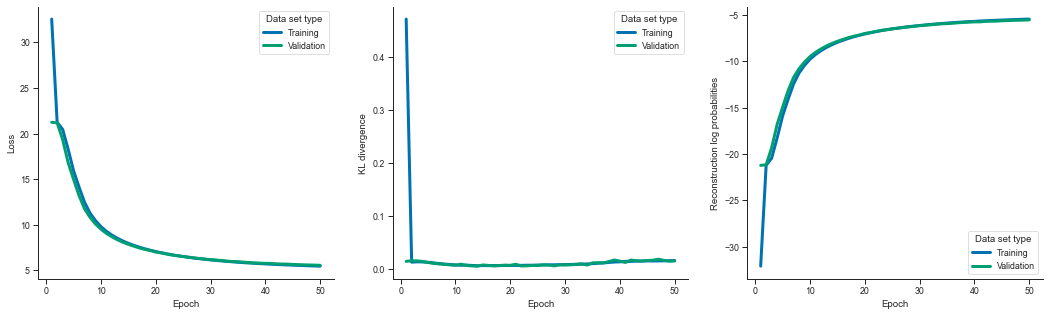

In [2]:
# Use the SummaryModels class
file_name = "RegionBornholm_01062019_30092019_CargTank_14400_86400_600"
summary_models = SummaryModels(file_name)
df_default = summary_models.load_curves_df("Default")
summary_models.plot_curves(df_default)

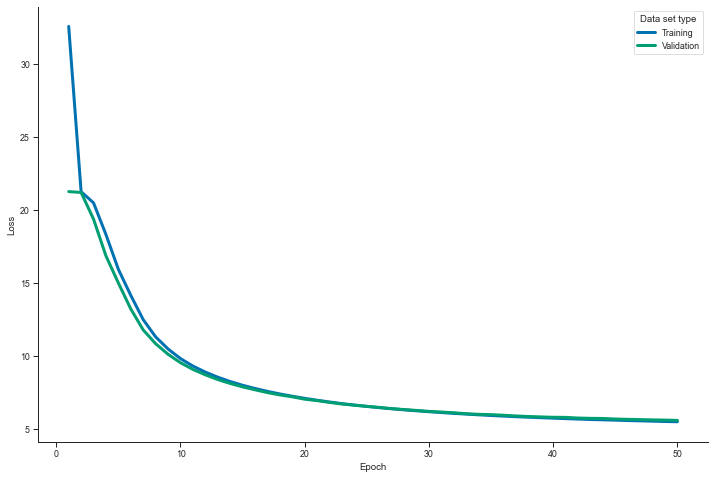

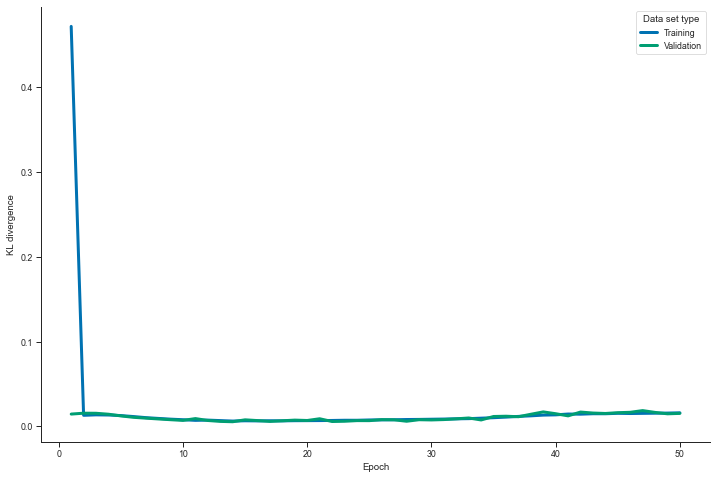

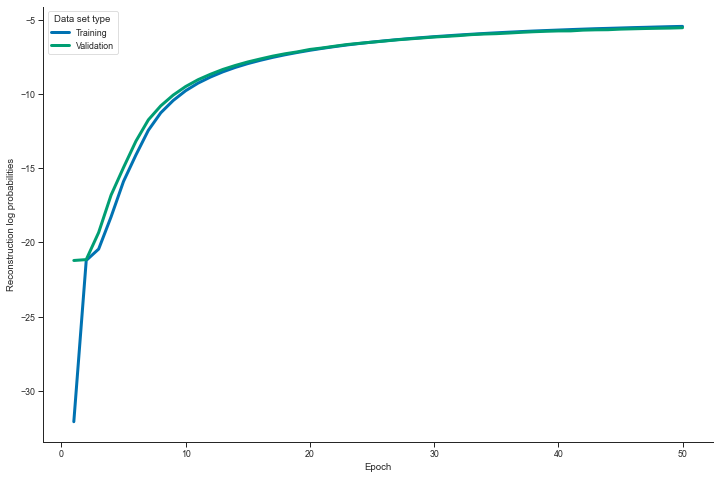

In [3]:
summary_models.plot_curves_large(df_default)

#  Add Scheduler

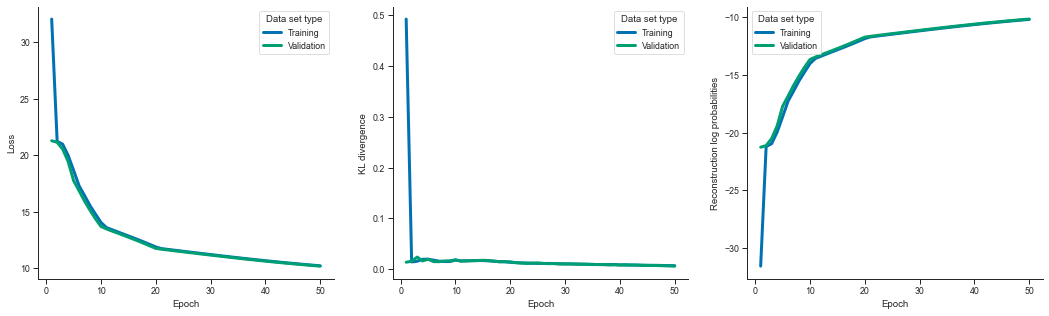

In [4]:
summary_models = SummaryModels(file_name, scheduler=True)
df_scheduler = summary_models.load_curves_df("Scheduler")
summary_models.plot_curves(df_scheduler)

#  Annealed Kullback–Leibler 

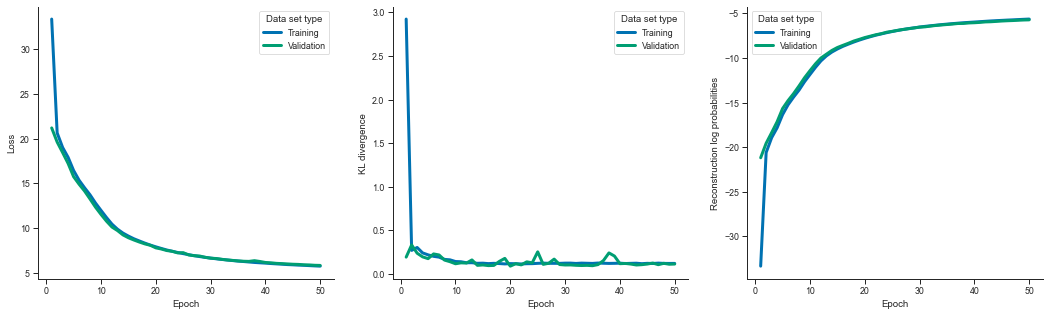

In [5]:
summary_models = SummaryModels(file_name, kl_annealing=True)
df_annealing = summary_models.load_curves_df("Annealing")
summary_models.plot_curves(df_annealing)

# Scheduler & Annealed Kullback–Leibler 

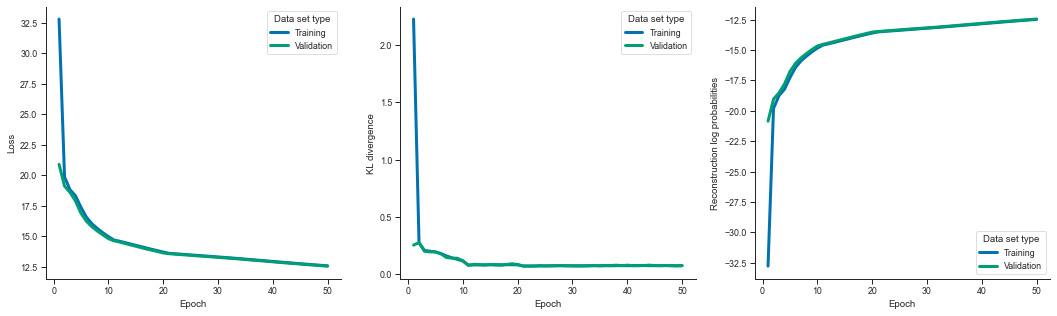

In [6]:
summary_models = SummaryModels(file_name, scheduler=True, kl_annealing=True)
df_scheduler_annealing = summary_models.load_curves_df("Scheduler_Annealing")
summary_models.plot_curves(df_scheduler_annealing)

# Different settings with no batch normalization

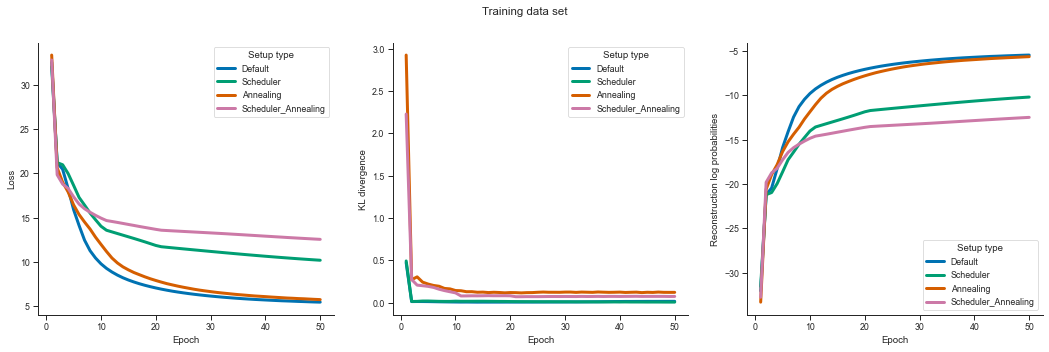

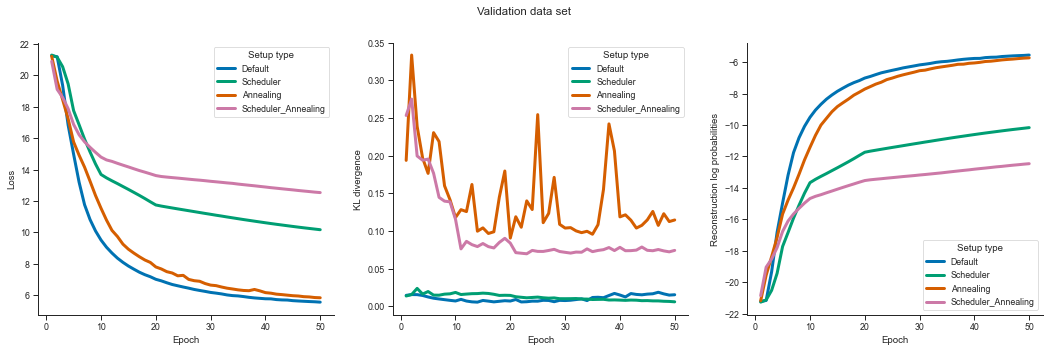

In [7]:
df = pd.concat([df_default, df_scheduler, df_annealing, df_scheduler_annealing])
df.reset_index(drop=True, inplace=True)
hue = "Setup type"
hue_order = ["Default", "Scheduler", "Annealing", "Scheduler_Annealing"]
summary_models.plot_curves(df[df["Data set type"] == "Training"], hue, hue_order, title="Training data set")
summary_models.plot_curves(df[df["Data set type"] == "Validation"], hue, hue_order, title="Validation data set")

# Use batch normalization
Use the VRNN model, 100 dimensional latent and recurrent laten space, batch normalization, but no scheduler or KL annealing. Showing results for cargo and tanker vessels

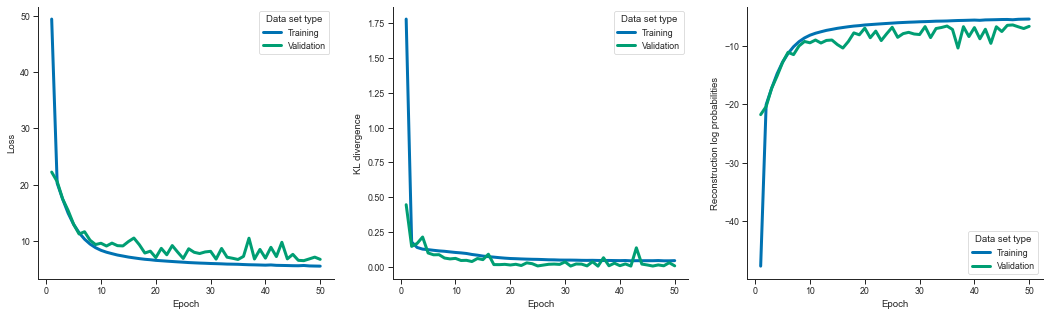

In [8]:
summary_models = SummaryModels(file_name, batch_norm=True)
df_batch_norm = summary_models.load_curves_df("Batch_Norm")
summary_models.plot_curves(df_batch_norm)

# Batch normalization & Scheduler

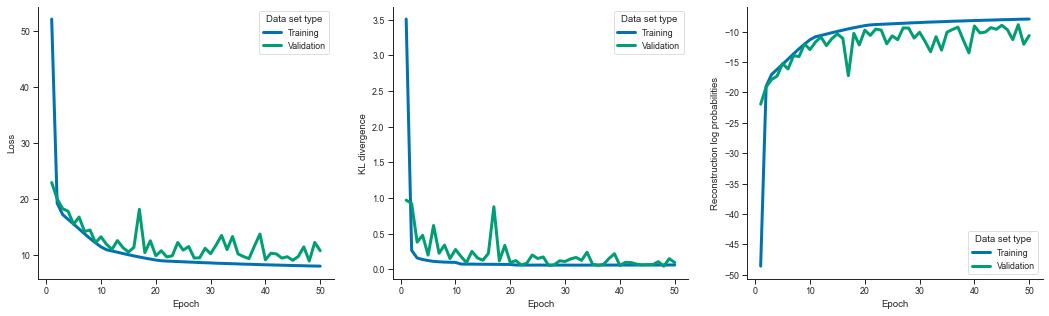

In [9]:
summary_models = SummaryModels(file_name, batch_norm=True, scheduler=True)
df_batch_norm_scheduler = summary_models.load_curves_df("Batch_Norm_Scheduler")
summary_models.plot_curves(df_batch_norm_scheduler)

#  Batch normalization & Annealed Kullback–Leibler 

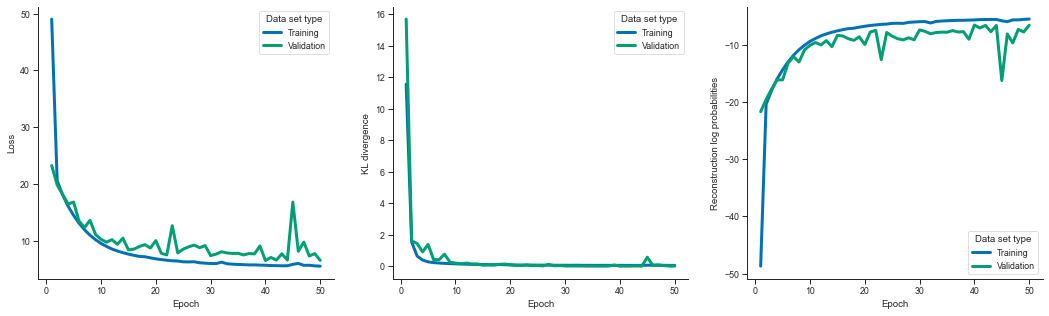

In [10]:
summary_models = SummaryModels(file_name, batch_norm=True, kl_annealing=True)
df_batch_norm_annealing = summary_models.load_curves_df("Batch_Norm_Annealing")
summary_models.plot_curves(df_batch_norm_annealing)

#  Batch normalization & Annealed Kullback–Leibler & Scheduler

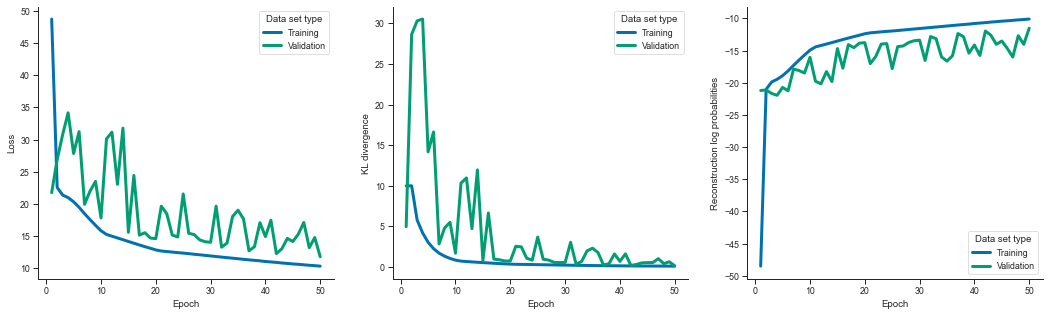

In [11]:
summary_models = SummaryModels(file_name, batch_norm=True, scheduler=True, kl_annealing=True)
df_batch_norm_scheduler_annealing = summary_models.load_curves_df("Batch_Norm_Scheduler_Annealing")
summary_models.plot_curves(df_batch_norm_scheduler_annealing)

# Different settings with batch normalization

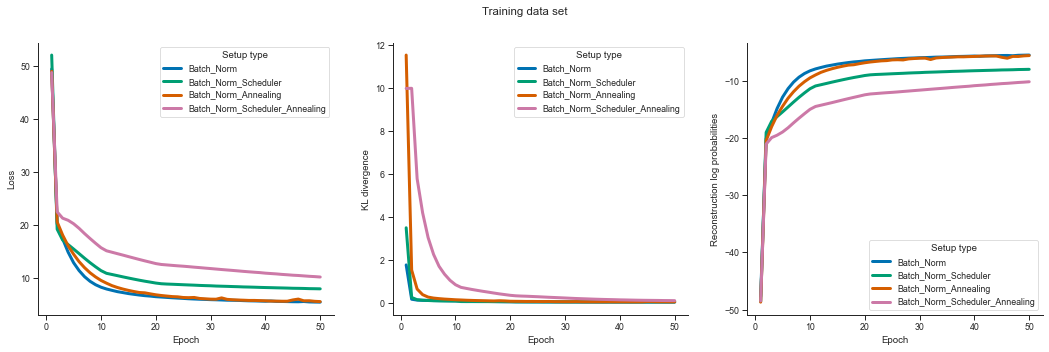

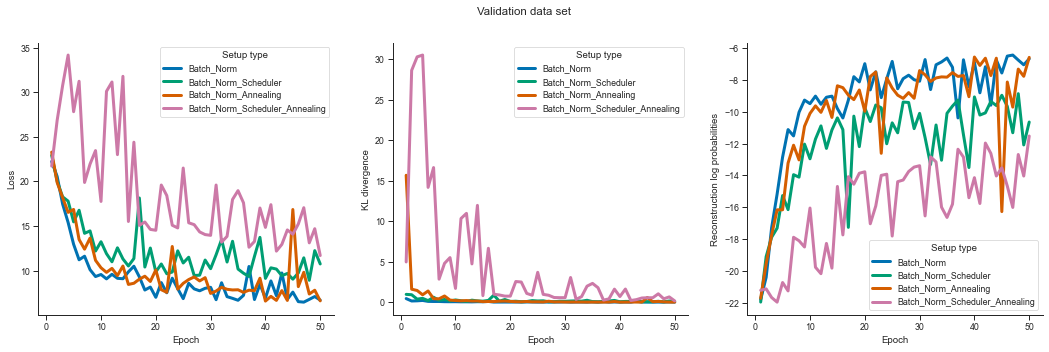

In [12]:
df = pd.concat([df_batch_norm, df_batch_norm_scheduler, df_batch_norm_annealing, df_batch_norm_scheduler_annealing])
df.reset_index(drop=True, inplace=True)
hue_order = ["Batch_Norm", "Batch_Norm_Scheduler", "Batch_Norm_Annealing", "Batch_Norm_Scheduler_Annealing"]
summary_models.plot_curves(df[df["Data set type"] == "Training"], hue, hue_order, title="Training data set")
summary_models.plot_curves(df[df["Data set type"] == "Validation"], hue, hue_order, title="Validation data set")

# Best setups (so far)

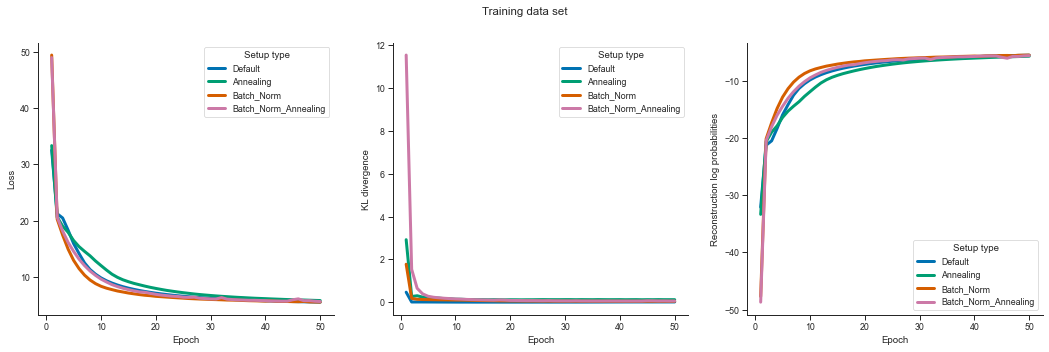

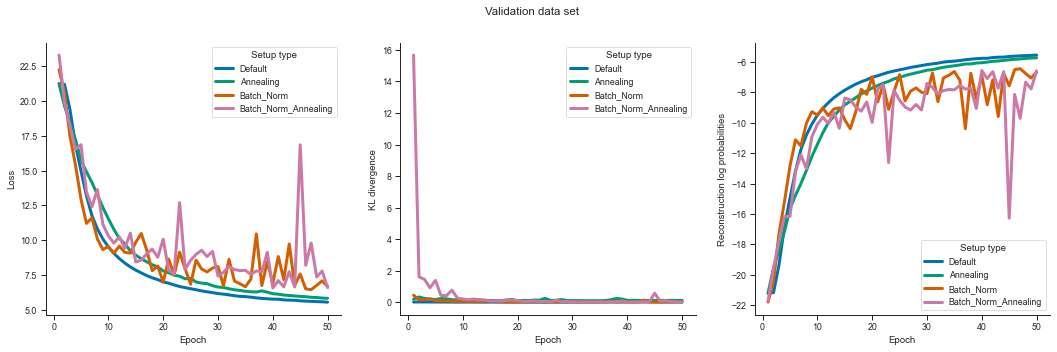

In [13]:
df = pd.concat([df_default, df_annealing, df_batch_norm, df_batch_norm_annealing])
df.reset_index(drop=True, inplace=True)
hue = "Setup type"
hue_order = ["Default", "Annealing", "Batch_Norm", "Batch_Norm_Annealing"]
summary_models.plot_curves(df[df["Data set type"] == "Training"], hue, hue_order, title="Training data set")
summary_models.plot_curves(df[df["Data set type"] == "Validation"], hue, hue_order, title="Validation data set")